In [2]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

%matplotlib inline

In [3]:
### Importación de la Base de datos ###
file = "../Machine Learning Python (ML)/BBDD/EstudioPrevalencia2015.xlsx"
xl = pd.ExcelFile(file)

In [4]:
print(xl.sheet_names)

['BBDD fichero total', 'títulos y códigos', 'Hoja1']


In [5]:
df=xl.parse('BBDD fichero total')

In [6]:
for column in df.columns:
    print(str(column))
df.head(10)

numero
modalidad
P0R1
P0B
POB1
P0B2
P0C
P0F1
POF2
POF3
POf3_2
POF4
P1P1A
P1P1B
P1P1C
P1P1D
P1P1E
P1P1F
P1P1G
P1P1H
P1P1I
P1P1J
P1P1K
P1P1L
P1P1M
P1P1N
P1P1O
P2P2A
P2P2B
P2P2C
P2P2D
P2P2E
P2P2F
P2P2G
P2P2H
P2P2I
P2P2J
P2P2K
P2P2L
P2P2M
P2P2N
P2P2O
P3
P3B
P4
P5
P6
P7
P8
P9
p10_1
p10_2
p10_2_A
p10r1
P10R2
P10R3
P10R4
P10R5
P10R6
P10R7
P10R8
P10R10
P10R11
P10R12
P10R12Otros_B
P11
P11B
P12A_1
P12A_2
P12A_3
P12B_1
P12B_2
P12B_3
P13
P14A1
P14B1
P14A2
P14B2
P14A3
P14B3
P14A4
P14B4
P14A5
P14B5
P14A6
P14B6
P14A7
P14B7
P14A8
P14B8
P14A9
P14B9
P14A10
P14B10
P14A11
P14B11
P14A12
P14B12
P14A13
P14B13
P14A14
P14B14
P14A15
P14B15
P14A16
P14B16
P14A17
P14B17
P15A
P15B
P15B1_1
P15B1_2
P15B1_3
P15B1R1
P15B1R2
P15B1R3
P15B1R4
P15B1R5
P15B1R6
P15B1R7
P15B1R8
P15B1R9
P15B1R10
P15B1R11
P15B1R12
P15B1R13
P15B1R14
P15B1R15
P15B1R16
P15B1R17
P15B1R18
P16A
P16B
P16C
P16D
V16D_2
P17P17A
P17P17B
P17P17C
P17P17D
P17P17E
P17P17F
P17P17G
P17P17H
P17P17I
P18A
P18B
P18C
P19_1
P19_2
P19_3
P19R1
P19R2
P19R3
P19R4
P19R5
P

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [7]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


In [8]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2.0
    else :
      return x

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  return new_df

In [9]:
new_df = cleanDataset(df)
new_df.columns

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)


Index(['P0R1', 'P0B', 'POB1', 'P0B2', 'P0C', 'P0F1', 'POF2', 'P1P1A', 'P1P1B',
       'P1P1C',
       ...
       'DB0', 'DB1', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'PESO',
       'PESO1'],
      dtype='object', length=125)

In [10]:
### Número de valores únicos en cada columna ###
new_df.nunique()

P0R1     19
P0B       6
POB1      6
P0B2     76
P0C       2
         ..
DB6       8
DB7       2
DB8       8
PESO     58
PESO1    62
Length: 125, dtype: int64

In [11]:
new_df.columns

Index(['P0R1', 'P0B', 'POB1', 'P0B2', 'P0C', 'P0F1', 'POF2', 'P1P1A', 'P1P1B',
       'P1P1C',
       ...
       'DB0', 'DB1', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'PESO',
       'PESO1'],
      dtype='object', length=125)

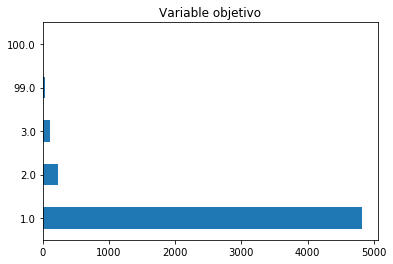

In [12]:
### Variable Objetivo ###
plot= df['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [13]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(new_df['P23'], new_df['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1.0,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2.0,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


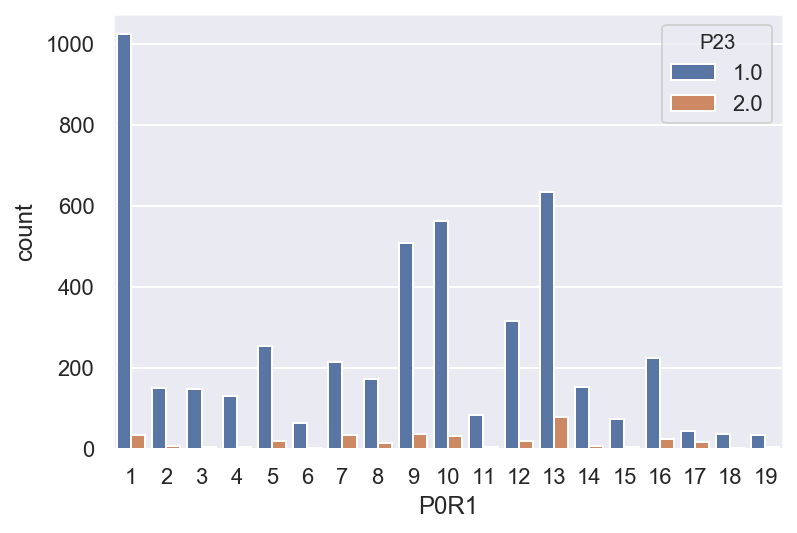

In [14]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=new_df);

In [15]:
new_df['P23'].unique()

array([1., 2.])

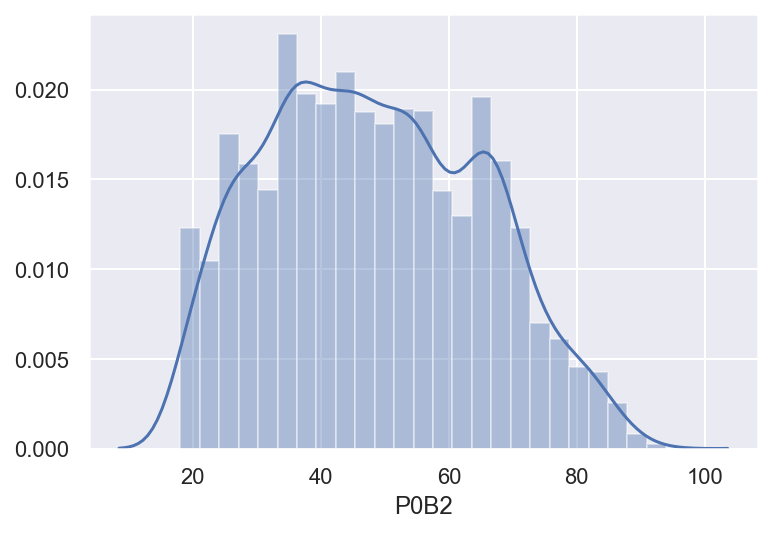

In [16]:
### Histograma de la edad ###
sns.distplot(new_df['P0B2'])

(array([193., 270., 325., 419., 779., 717., 876., 822., 579., 179.]),
 array([2.89037176, 3.05566406, 3.22095636, 3.38624867, 3.55154097,
        3.71683327, 3.88212557, 4.04741787, 4.21271018, 4.37800248,
        4.54329478]),
 <a list of 10 Patch objects>)

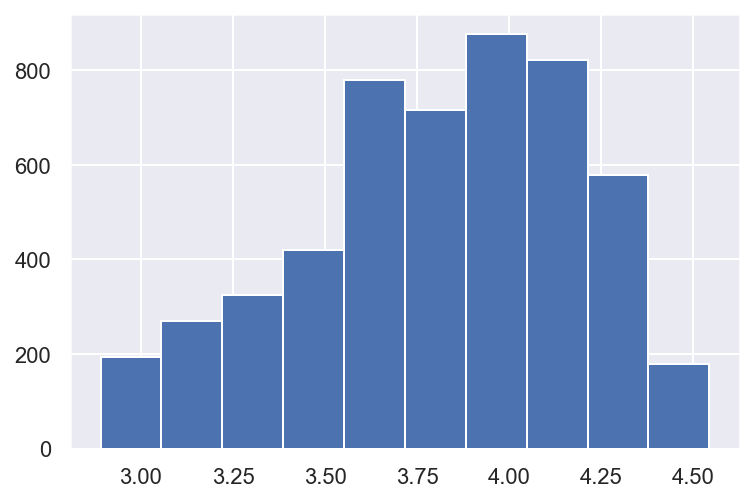

In [17]:
### Histograma ###
log_edad = np.log(new_df['P0B2'])
plt.hist(log_edad)

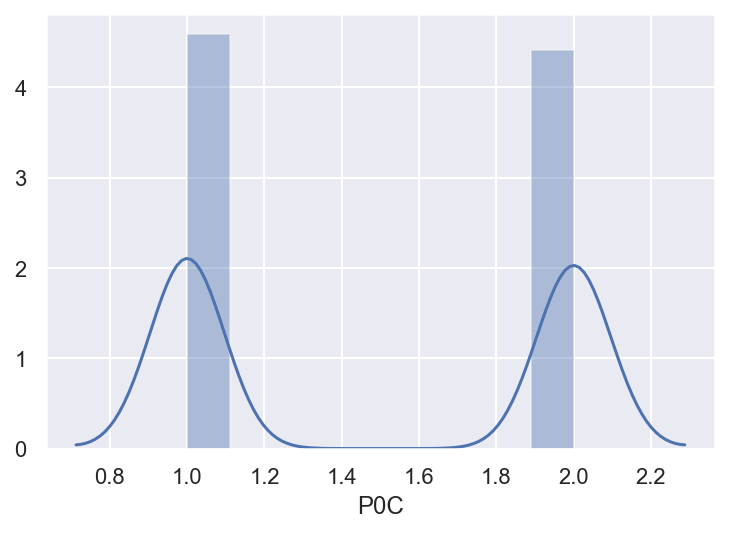

In [18]:
### Histograma del sexo ###
sns.distplot(new_df['P0C'])

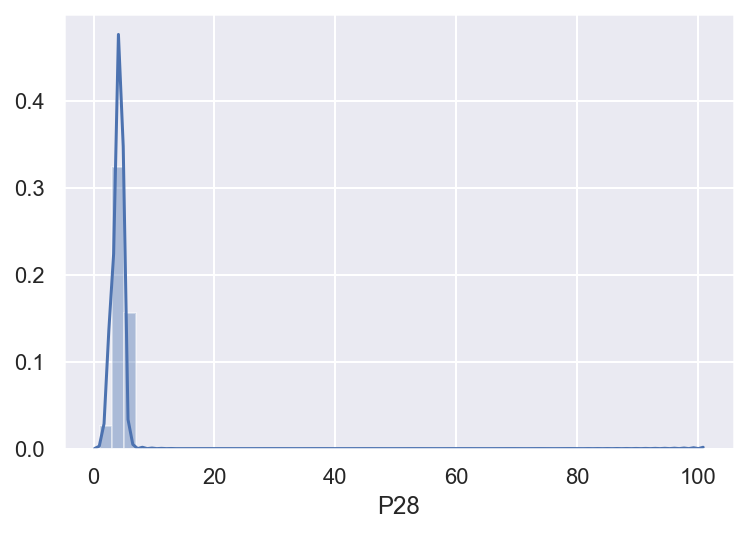

In [19]:
### Histograma Estado de Salud ###
sns.distplot(new_df['P28'])

In [20]:
new_df.columns.to_list()

['P0R1',
 'P0B',
 'POB1',
 'P0B2',
 'P0C',
 'P0F1',
 'POF2',
 'P1P1A',
 'P1P1B',
 'P1P1C',
 'P1P1D',
 'P1P1E',
 'P1P1F',
 'P1P1G',
 'P1P1H',
 'P1P1I',
 'P1P1J',
 'P1P1K',
 'P1P1L',
 'P1P1M',
 'P1P1N',
 'P1P1O',
 'P2P2A',
 'P2P2B',
 'P2P2C',
 'P2P2D',
 'P2P2E',
 'P2P2F',
 'P2P2G',
 'P2P2H',
 'P2P2I',
 'P2P2J',
 'P2P2K',
 'P2P2L',
 'P2P2M',
 'P2P2N',
 'P2P2O',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P11',
 'P12A_1',
 'P13',
 'P14A1',
 'P14A2',
 'P14A3',
 'P14A4',
 'P14A5',
 'P14A6',
 'P14A7',
 'P14A8',
 'P14A9',
 'P14A10',
 'P14A11',
 'P14A12',
 'P14A13',
 'P14A14',
 'P14A15',
 'P14A16',
 'P14A17',
 'P15A',
 'P16A',
 'P17P17A',
 'P17P17B',
 'P17P17C',
 'P17P17D',
 'P17P17E',
 'P17P17F',
 'P17P17G',
 'P17P17H',
 'P17P17I',
 'P18A',
 'P18B',
 'P18C',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25P25A',
 'P25P25B',
 'P25P25C',
 'P25P25D',
 'P25P25E',
 'P25P25F',
 'P25P25G',
 'P25P25H',
 'P25P25I',
 'P25P25J',
 'P26',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',


In [21]:
Datos=['P0R1',
 'P0B',
 'POB1',
 'P0C',
 'P46',      
 'DB0',
 'DB1',
 'DB3',
 'DB4', 
 'DB5',
 'DB6',
 'DB7',
 'DB8',      
 'P23']

In [22]:
new_df= new_df[Datos]
new_df.head()

,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,7,4,2,1,4,2,2,1,3,1.0
1,3,5,6,1,8,3,4,5,5,1,1,1,1,1.0
2,4,5,8,2,9,2,4,100,100,4,5,1,4,1.0
3,5,5,7,2,11,3,1,100,100,2,3,1,3,1.0
4,5,5,6,2,9,3,1,3,5,2,3,1,3,1.0


In [23]:
new_df.shape

(5159, 14)

In [24]:
new_df.dtypes

P0R1      int64
P0B       int64
POB1      int64
P0C       int64
P46       int64
DB0       int64
DB1       int64
DB3       int64
DB4       int64
DB5       int64
DB6       int64
DB7       int64
DB8       int64
P23     float64
dtype: object

In [25]:
new_df.isnull().sum()

P0R1    0
P0B     0
POB1    0
P0C     0
P46     0
DB0     0
DB1     0
DB3     0
DB4     0
DB5     0
DB6     0
DB7     0
DB8     0
P23     0
dtype: int64

In [26]:
new_df=new_df.dropna()

In [27]:
new_df.describe()

,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
P0R1,1.000000,0.081504,0.007794,-0.028402,-0.022115,0.017116,-0.006708,0.103939,0.120185,0.010942,-0.019756,0.061147,0.000958,0.088680
P0B,0.081504,1.000000,0.019631,0.000150,-0.021996,0.039128,0.012656,0.029350,0.053335,-0.003165,-0.003295,0.012203,-0.017263,0.002683
POB1,0.007794,0.019631,1.000000,0.074493,-0.048079,-0.123370,0.128538,0.065753,-0.023110,0.072746,0.130784,-0.086602,-0.044185,-0.005240
P0C,-0.028402,0.000150,0.074493,1.000000,-0.000296,-0.020212,0.046831,-0.024334,-0.019600,0.022125,0.003685,-0.003866,-0.022105,-0.044307
P46,-0.022115,-0.021996,-0.048079,-0.000296,1.000000,0.016944,-0.019365,0.035614,0.025496,-0.002511,-0.011219,-0.017921,-0.002039,-0.026351
DB0,0.017116,0.039128,-0.123370,-0.020212,0.016944,1.000000,0.394382,0.068863,0.060531,0.104060,0.077969,0.007994,0.100582,-0.007936
DB1,-0.006708,0.012656,0.128538,0.046831,-0.019365,0.394382,1.000000,0.064724,0.058387,0.259144,0.295197,-0.010159,0.244412,0.035601
DB3,0.103939,0.029350,0.065753,-0.024334,0.035614,0.068863,0.064724,1.000000,0.839886,0.063551,0.061164,-0.022784,0.081716,0.020869
DB4,0.120185,0.053335,-0.023110,-0.019600,0.025496,0.060531,0.058387,0.839886,1.000000,0.045897,0.042181,-0.003073,0.088158,0.023264
DB5,0.010942,-0.003165,0.072746,0.022125,-0.002511,0.104060,0.259144,0.063551,0.045897,1.000000,0.485629,0.000275,0.432820,0.019169


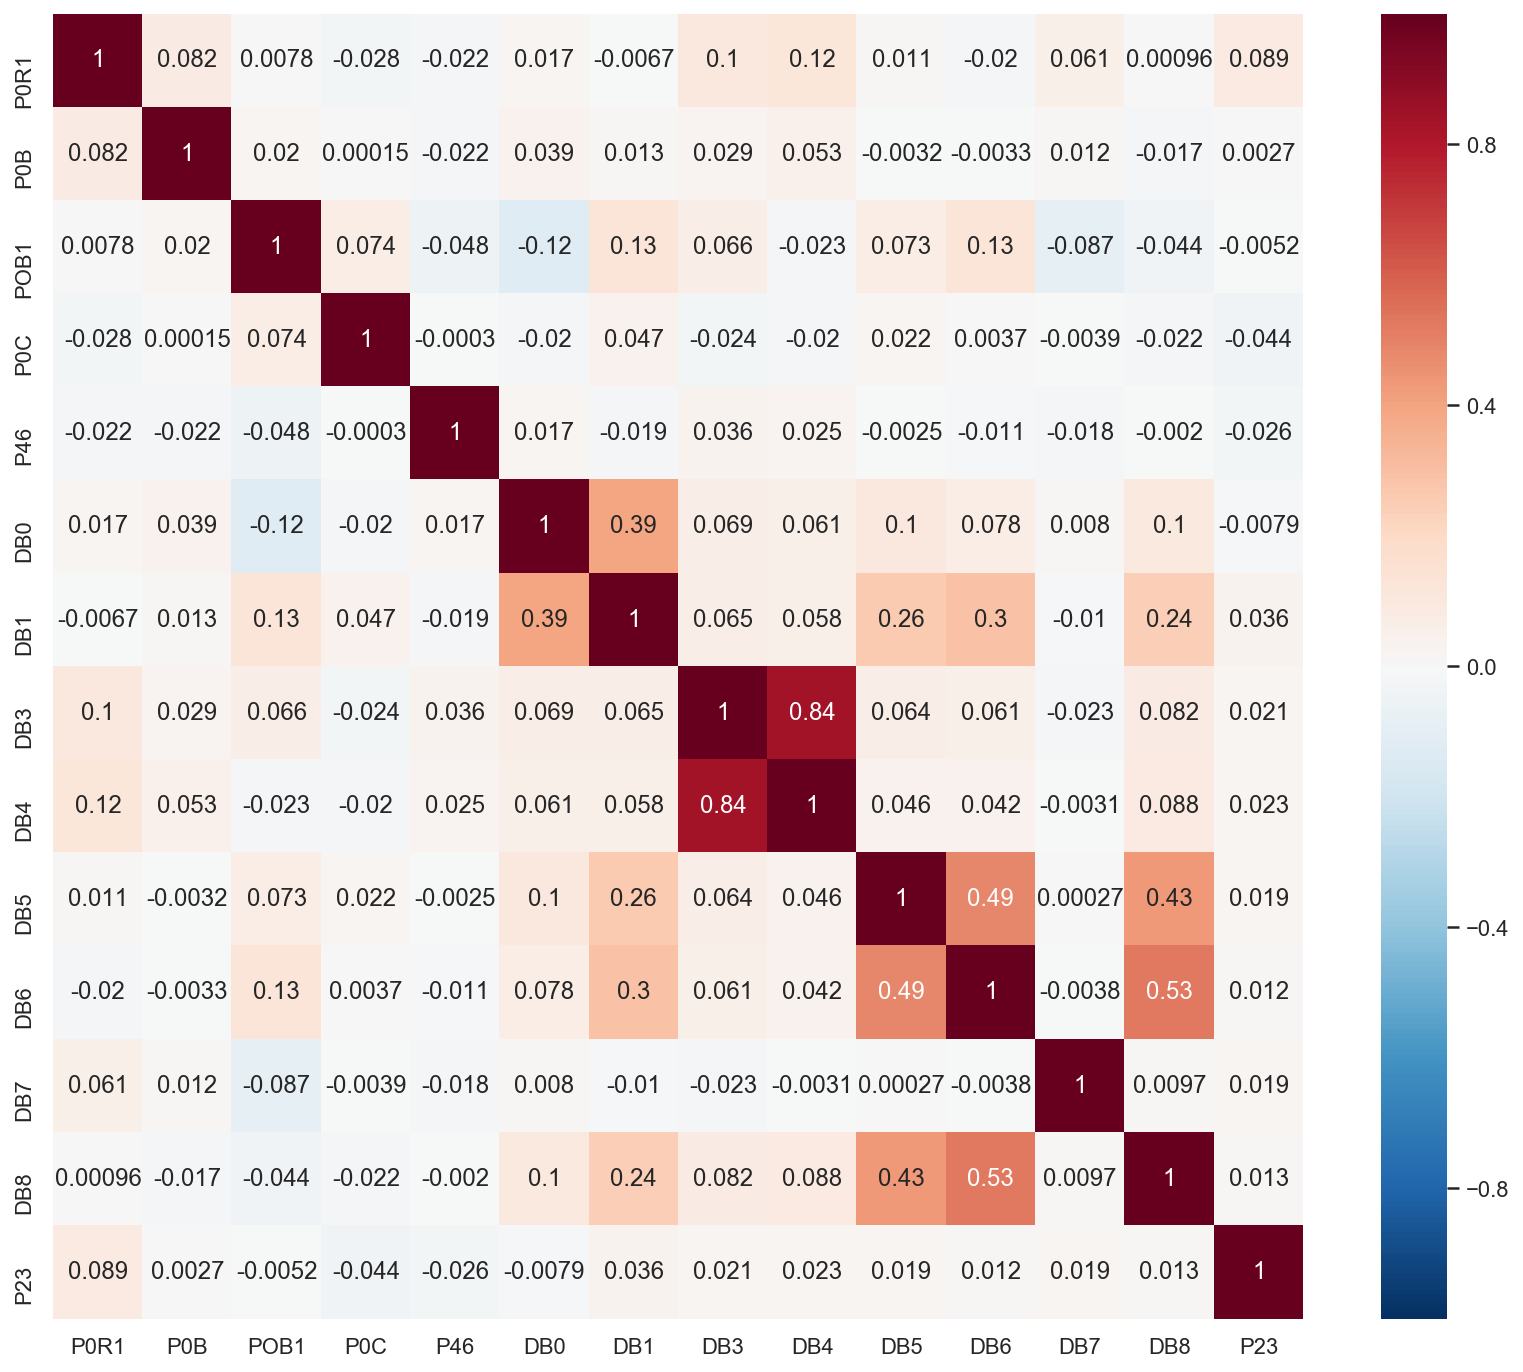

In [28]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [40]:
new_df["P23"].value_counts()

1.0    4820
2.0     339
Name: P23, dtype: int64

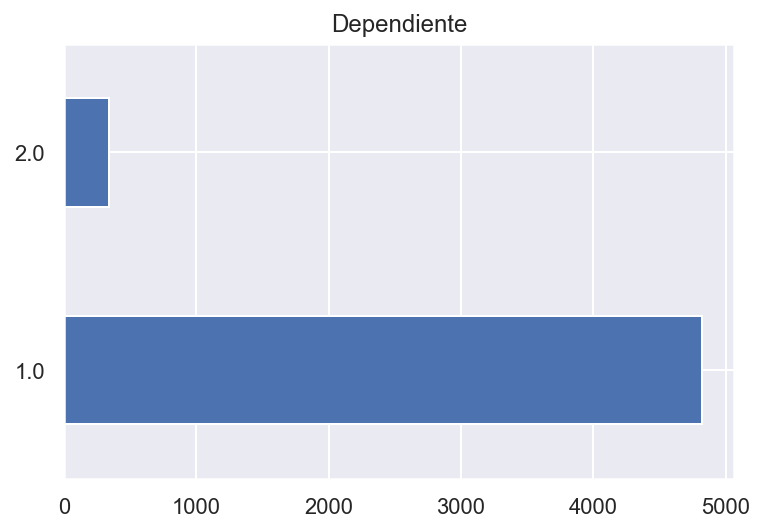

In [41]:
plot= new_df["P23"].value_counts().plot(kind='barh', title="Dependiente") 

In [50]:
y = new_df['P23']
X = new_df.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [51]:
predictores= X_train.columns.tolist()

In [52]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
model = run_model(X_train, X_test, y_train, y_test)
    

In [53]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')

model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


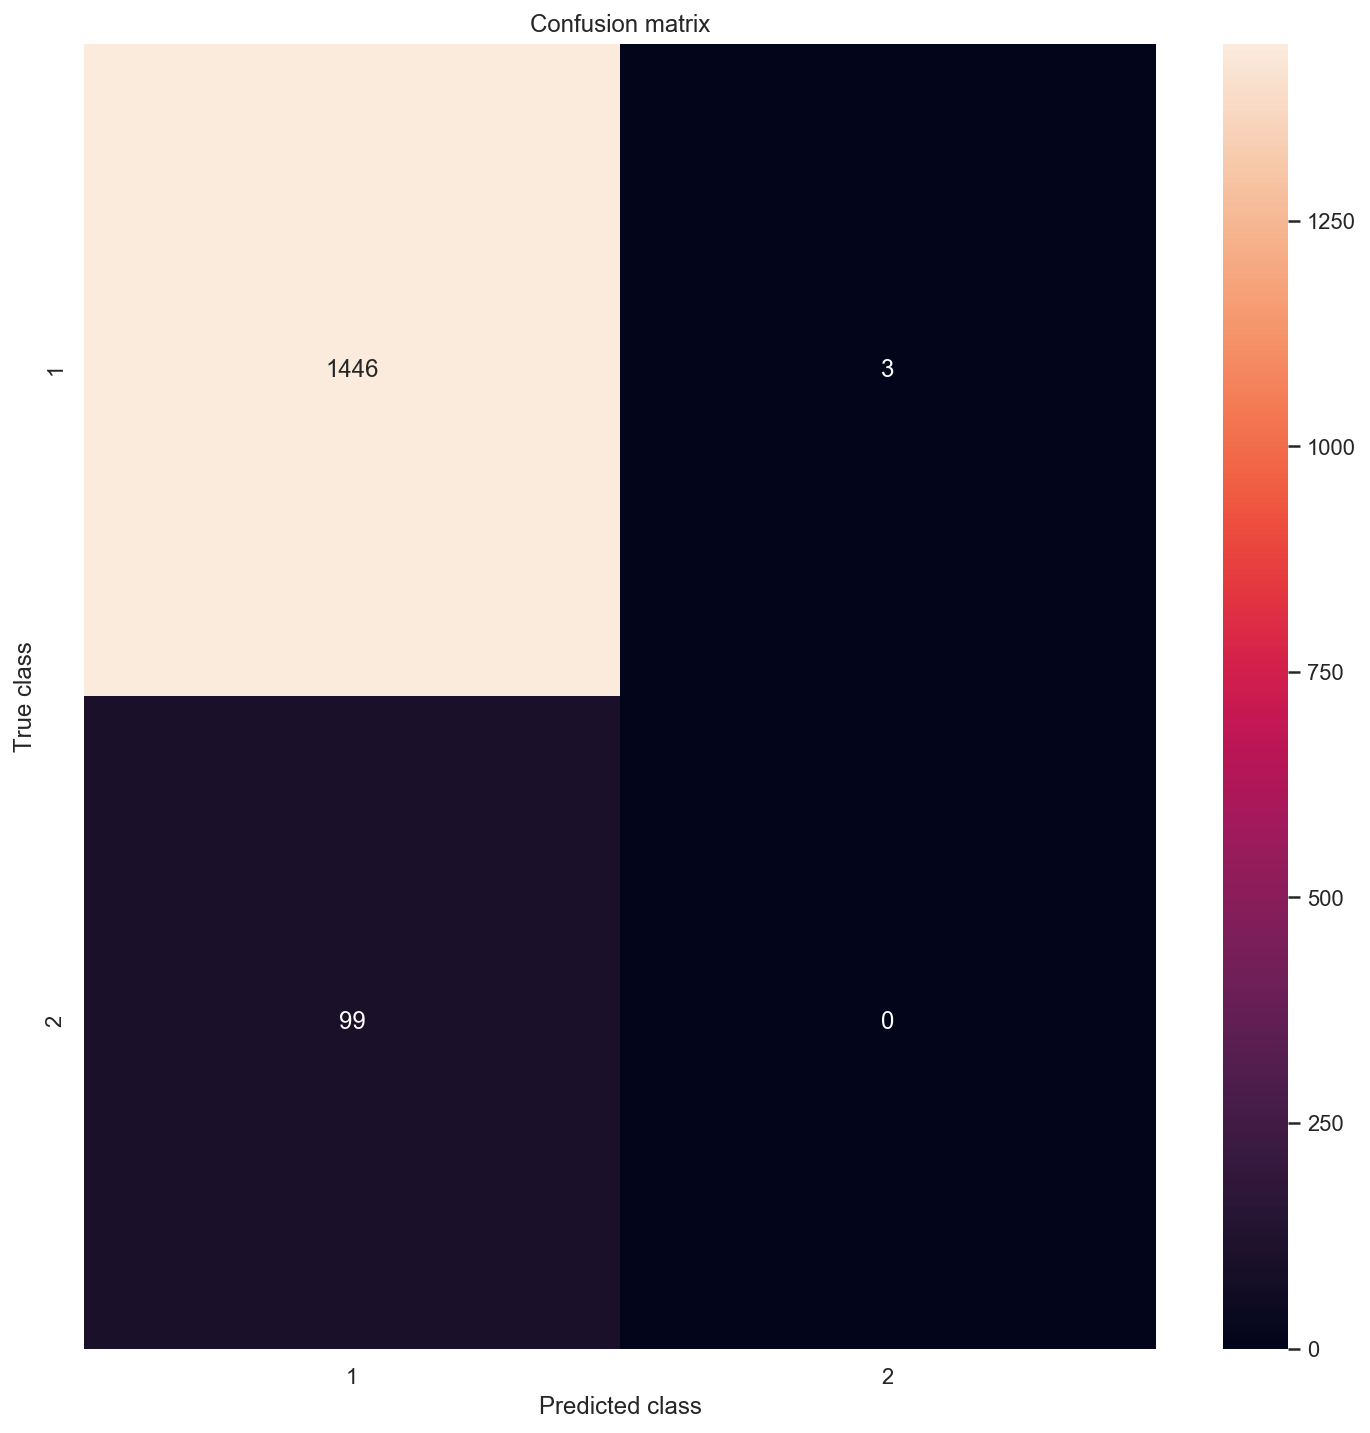

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97      1449
         2.0       0.00      0.00      0.00        99

    accuracy                           0.93      1548
   macro avg       0.47      0.50      0.48      1548
weighted avg       0.88      0.93      0.90      1548



In [54]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [55]:
### Balanceo SMOTE ###

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({1.0: 3371, 2.0: 240})
Distribution of class labels after resampling Counter({1.0: 3343, 2.0: 3343})


In [56]:
model = run_model(X_train_res, X_test, y_train_res, y_test)

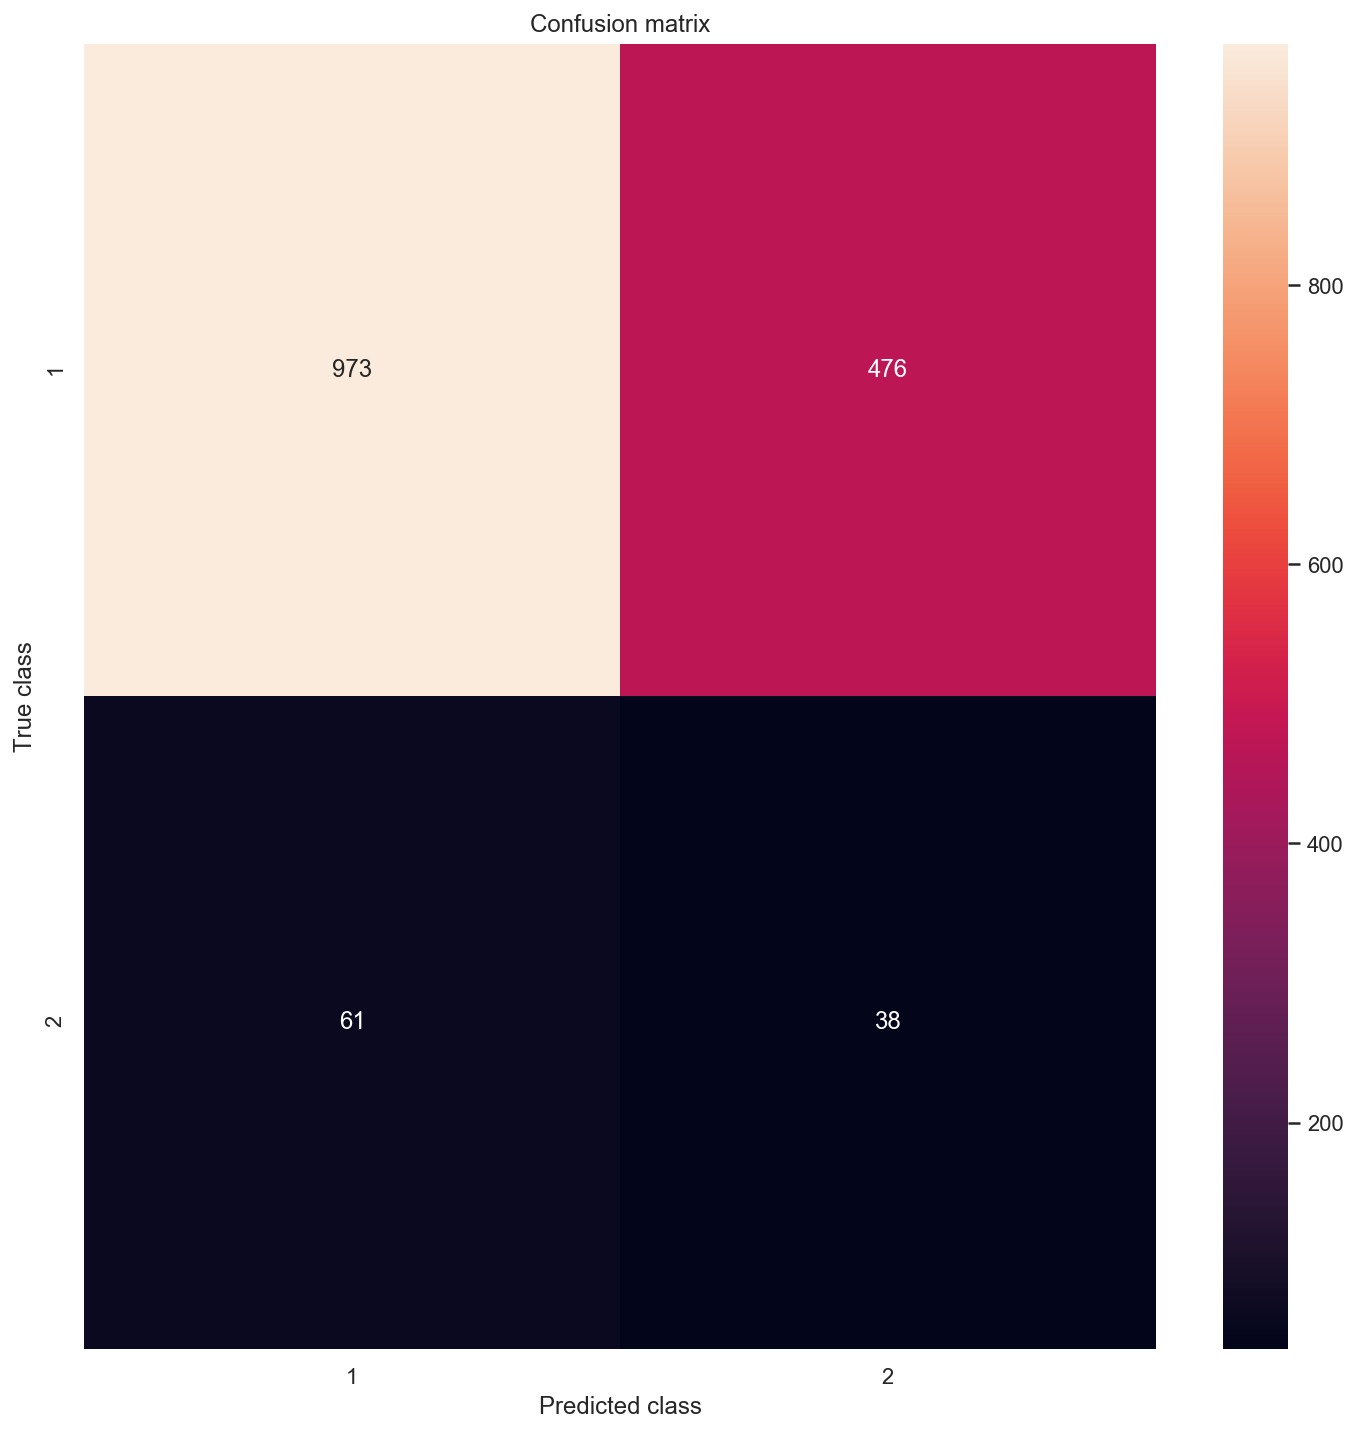

              precision    recall  f1-score   support

         1.0       0.94      0.67      0.78      1449
         2.0       0.07      0.38      0.12        99

    accuracy                           0.65      1548
   macro avg       0.51      0.53      0.45      1548
weighted avg       0.89      0.65      0.74      1548



In [57]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)